**Reading [MNIST](https://github.com/HosseinZaredar/Computational-Intelligence/blob/main/read_MNIST.py) dataset:**

In [ ]:
import numpy as np

base_path = ''
# Reading The Train Set
train_images_file = open(base_path + 'train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open(base_path + 'train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open(base_path + 't10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open(base_path + 't10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


Function to show images:

In [ ]:
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')
    plt.show()

def plot(x, y):
    axes= plt.axes()
    plt.plot(x, y)
    axes.grid()
    plt.show()


Testing the read data:

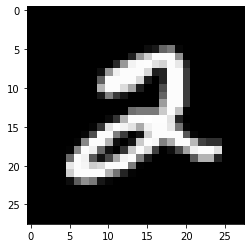

2


In [ ]:
# Plotting an image
show_image(train_set[5][0])

def get_number(image_value):
  sum = 0
  for c in image_value[1]:
      if c == 0:
          sum += 1
      else:
          break
  return sum

print(get_number(train_set[5]))

Neural Network's structure:
- 28*28 = 784 neurons for first layer
- Hidden layers: 2nd & 3rd layer -> 16 neurons
- Last layer: output -> 10 neurons
  
**Initialize wieght matrixes and bias arrays and grads:**

In [ ]:
layerNeurons = [784, 16, 16, 10]

def init_nn():
    center = 0
    margin = 1
    w21Mat = np.random.normal(center, margin, size = (layerNeurons[1], layerNeurons[0]))
    b1 = np.zeros((layerNeurons[1],1))

    w32Mat = np.random.normal(center, margin, size = (layerNeurons[2], layerNeurons[1]))
    b2 = np.zeros((layerNeurons[2],1))

    w43Mat = np.random.normal(center, margin, size = (layerNeurons[3], layerNeurons[2]))
    b3 = np.zeros((layerNeurons[3],1))
    return w21Mat, w32Mat, w43Mat, b1, b2, b3

def init_grad():
    grad_W21 = np.zeros((layerNeurons[1], layerNeurons[0]))
    grad_W32 = np.zeros((layerNeurons[2], layerNeurons[1]))
    grad_W43 = np.zeros((layerNeurons[3], layerNeurons[2]))

    grad_b1 = np.zeros((layerNeurons[1],1))
    grad_b2 = np.zeros((layerNeurons[2],1))
    grad_b3 = np.zeros((layerNeurons[3],1))

    grad_a0 = np.zeros((layerNeurons[0],1))
    grad_a1 = np.zeros((layerNeurons[1],1))
    grad_a2 = np.zeros((layerNeurons[2],1))

    return grad_W21, grad_W32, grad_W43, grad_b1, grad_b2, grad_b3, grad_a0, grad_a1, grad_a2

**Activation function:**

In [180]:
import math

def sigmoid(x):
  if x<0:
    return 1 - 1/(1 + math.exp(x))
  else:
    return 1/(1 + math.exp(-x))

sigmoid = np.vectorize(sigmoid)

def sigmoid_deriv(x):  
  return sigmoid(x)*(1-sigmoid(x))

def tanh(x):
  return math.tanh(x)
tanh = np.vectorize(tanh)

def tanh_deriv(x):
  return 1 / np.cosh(-x)

tanh_deriv = np.vectorize(tanh_deriv)

`result()` returns an array containing zero values except the index correspondening to the index of maximum value in the NN's last layer which has the value of 1.

In [ ]:
def result(o):
  max_index = 0
  max_num = 0
  output = np.zeros((10,1))
  
  for i in range(len(o)):
    if o[i] > max_num:
      max_num = o[i]
      max_index = i
  
  output[max_index] = 1
  return output

**`run_nn()`**Calculate Output and Weights and biases and ... for one input.

In [ ]:
def run_nn(input, w21Mat, w32Mat, w43Mat, b1, b2, b3, activation_func = sigmoid):
  z1 = (w21Mat @ input) + b1
  a1 = activation_func(z1)

  z2 = (w32Mat @ a1) + b2
  a2 = activation_func(z2)

  z3 = (w43Mat @ a2) + b3
  a3 = activation_func(z3)
  return result(a3), a3 , a2 ,a1, input, z3, z2, z1


In [ ]:
def calculate_accuracy(input_set, output):
  counter = 0
  for i in range(len(output)):
    if np.array_equal(output[i], input_set[i][1]):
      counter+=1
  return counter

def calculate_accuracy_percent(input_set, output):
  return calculate_accuracy(input_set, output)/len(output)

**Calculate result for first 100 images(قدم دوم):**

In [ ]:
w21Mat, w32Mat, w43Mat, b1, b2, b3 = init_nn()
output = []
for i in range(100):
  o, _, _, _, _, _, _, _ = run_nn(train_set[i][0],w21Mat, w32Mat, w43Mat, b1, b2, b3 )
  output.append(o)

print('Accuracy: ' + str(calculate_accuracy_percent(train_set, output)))
  

Accuracy: 0.16


**Script for NN(Not vectorized)**


In [ ]:
import time 
from tqdm import tqdm

def nn_not_vectorized(learning_rate = 1, number_of_epochs = 20, batch_size = 10):
  before = time.time()

  w21Mat, w32Mat, w43Mat, b1, b2, b3 = init_nn()
  costPerEpoch = np.zeros(number_of_epochs)
  cost = 0

  total_acc = 0
  out = []
  for epoch in range(number_of_epochs):
    del out[:]
    for batch_num in range(int(100 / batch_size)):
      batch = train_set[batch_num * batch_size:(batch_num+1)* batch_size]
      grad_W21, grad_W32, grad_W43, grad_b1, grad_b2, grad_b3, grad_a0, grad_a1, grad_a2 = init_grad()

      for image_value in batch:
        image = image_value[0]
        output, a3, a2, a1, a0, z3, z2, z1 = run_nn(image, w21Mat, w32Mat, w43Mat, b1, b2, b3)
        out.append(output)
        # dcost/dw:
        #Third layer
        for j in range(layerNeurons[3]):
          temp_b3 = sigmoid_deriv(z3[j]) * 2 * (a3[j] - image_value[1][j])
          grad_b3[j] += temp_b3
          for k in range(layerNeurons[2]):
            grad_W43[j, k] += a2[k] *  temp_b3
            
        for k in range(layerNeurons[2]):
          for j in range(layerNeurons[3]):
            grad_a2[k] += w43Mat[j, k] *  sigmoid_deriv(z3[j]) * 2 * (a3[j] - image_value[1][j])

        #Second layer
        for j in range(layerNeurons[2]):
          temp_b2 = sigmoid_deriv(z2[j]) * grad_a2[j]
          grad_b2[j] += temp_b2
          for k in range(layerNeurons[1]):
            grad_W32[j, k] += a1[k] * temp_b2

        for k in range(layerNeurons[1]):
          for j in range(layerNeurons[2]):
            grad_a1[k] += w32Mat[j, k] * sigmoid_deriv(z2[j]) * grad_a2[j]

        #First layer
        for j in range(layerNeurons[1]):
          temp_b1 = sigmoid_deriv(z1[j]) * grad_a1[j]
          grad_b1[j] += temp_b1
          for k in range(layerNeurons[0]):
            grad_W21[j, k] += a0[k] * temp_b1

        for j in range(layerNeurons[3]):
          cost += (a3[j] - image_value[1][j]) ** 2
      
      w43Mat -= learning_rate * (grad_W43 / batch_size)
      w32Mat -= learning_rate * (grad_W32 / batch_size)
      w21Mat -= learning_rate * (grad_W21 / batch_size)

      b3 -= learning_rate * (grad_b3 / batch_size)
      b2 -= learning_rate * (grad_b2 / batch_size)
      b1 -= learning_rate * (grad_b1 / batch_size)

    costPerEpoch[epoch] += cost/100

    cost = 0
    total_acc += calculate_accuracy(train_set, out)
    

  now = time.time()
  total_acc = total_acc / (number_of_epochs * 100)

  return (now - before), total_acc, costPerEpoch

total_time, total_accuracy, costPEpoch = nn_not_vectorized(1, 20 , 10)


**Using the first 100 images and Backpropagation(قدم سوم):**
- Plot Costs/epoch 
- Calculate total running time  
 
```
learning_rate = 1
number_of_epochs = 20
batch_size = 10
```

Total run time: 3.0765849312146503 min
Accuracy 0.3875


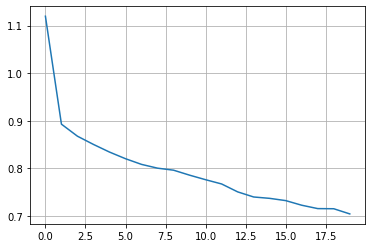

In [ ]:
number_of_epochs = 20

print("Total run time:", total_time/60, "min")
print("Accuracy", total_accuracy)
plot(np.arange(0, number_of_epochs, step = 1), costPEpoch)

**Vectorized NN script:**


In [ ]:
import time 
def nn_vectorized(input_set, images_count = 100, learning_rate = 1, number_of_epochs = 20, batch_size = 10, activation_func = sigmoid):
  before = time.time()

  activation_func_deriv = sigmoid_deriv
  if activation_func == relu:
    activation_func_deriv = relu_deriv
  elif activation_func == tanh:
    activation_func_deriv = tanh_deriv

  w21Mat, w32Mat, w43Mat, b1, b2, b3 = init_nn()
  costPerEpoch = np.zeros(number_of_epochs)
  cost = 0

  total_acc = 0
  out = []
  for epoch in range(number_of_epochs):
    del out[:]
    for batch_num in range(int(images_count / batch_size)):
      batch = input_set[batch_num * batch_size:(batch_num+1)* batch_size]
      grad_W21, grad_W32, grad_W43, grad_b1, grad_b2, grad_b3, grad_a0, grad_a1, grad_a2 = init_grad()

      for image_value in batch:
        image = image_value[0]
        output, a3, a2, a1, a0, z3, z2, z1 = run_nn(image, w21Mat, w32Mat, w43Mat, b1, b2, b3, activation_func)
        out.append(output)
        # dcost/dw:
        #Third layer
        tempb3 = 2 * activation_func_deriv(z3) * (a3 - image_value[1])
        grad_b3 += tempb3
        grad_W43 += tempb3 @ (np.transpose(a2))
        grad_a2 += np.transpose(w43Mat) @ tempb3
      
        #Second layer
        tempb2 =  activation_func_deriv(z2) * grad_a2
        grad_b2 += tempb2
        grad_W32 += tempb2 @ (np.transpose(a1)) 
        
        grad_a1 += np.transpose(w32Mat) @ tempb2
      
        #First layer
        tempb1 = activation_func_deriv(z1) * grad_a1
        grad_b1 += tempb1
        grad_W21 += tempb1 @ (np.transpose(a0)) 
      
        #Cost
        for j in range(layerNeurons[3]):
          cost += (a3[j] - image_value[1][j]) ** 2
      
      w43Mat -= learning_rate * (grad_W43 / batch_size)
      w32Mat -= learning_rate * (grad_W32 / batch_size)
      w21Mat -= learning_rate * (grad_W21 / batch_size)

      b3 -= learning_rate * (grad_b3 / batch_size)
      b2 -= learning_rate * (grad_b2 / batch_size)
      b1 -= learning_rate * (grad_b1 / batch_size)

    costPerEpoch[epoch] += cost/images_count
    cost = 0
    total_acc += calculate_accuracy(input_set, out)
    
  now = time.time()
  total_acc = total_acc / (images_count * number_of_epochs)

  return (now - before), total_acc, costPerEpoch, w21Mat, w32Mat, w43Mat, b1, b2, b3

**Using the first 100 images and Backpropagation(قدم چهارم, Vectorized):**
- Plot Costs/epoch 
- Calculate total running time  
- Calculate Accuracy

Total run time: 0.22893885374069214 min
Accuracy: 0.63045


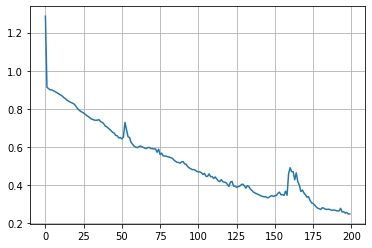

In [204]:
number_of_epochs2 = 200
total_time2, total_accuracy2, costPerEpoch2, _, _, _, _, _, _ = nn_vectorized(train_set, number_of_epochs=number_of_epochs2)

print("Total run time:", total_time2/60, "min")
print("Accuracy:", total_accuracy2)
plot(np.arange(0, number_of_epochs2, step = 1), costPerEpoch2)

**Run the program for the whole training set(60000):**

In [ ]:
number_of_epochs_final = 5
final_total_time, final_total_accuracy, final_costPerEpoch, final_w21Mat, final_w32Mat, final_w43Mat, final_b1, final_b2, final_b3  = nn_vectorized(train_set, images_count=60000, learning_rate=1, number_of_epochs=number_of_epochs_final, batch_size=5, activation_func= sigmoid)

Results:

Total run time: 3.475572037696838 min
Train Set Accuracy: 0.8339266666666667


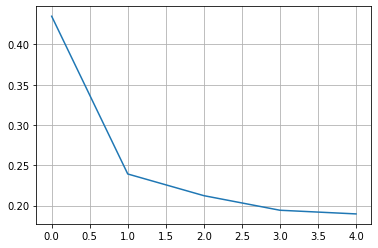

In [ ]:
print("Total run time:", final_total_time/60, "min")
print("Train Set Accuracy:", final_total_accuracy)
plot(np.arange(0, number_of_epochs_final, step = 1), final_costPerEpoch)

**Run test set:**

In [ ]:
output = []
for i in range(len(test_set)):
  o, _, _, _, _, _, _, _ = run_nn(test_set[i][0],final_w21Mat, final_w32Mat, final_w43Mat, final_b1, final_b2, final_b3, sigmoid)
  output.append(o)
print('Test set Accuracy: ' + str(calculate_accuracy_percent(test_set, output)))

Test set Accuracy: 0.9015


**Shift images:**

In [ ]:
from copy import deepcopy
shift_test_set = []
for i in range(len(test_set)):
  image_value = deepcopy(test_set[i])
  image = image_value[0].reshape((28,28))
  for j in range(28):
    image[j][4:28] = image[j][0:24]
    image[j][0] = 0 
    image[j][1] = 0
    image[j][2] = 0
    image[j][3] = 0
  image = image.reshape(784,1)
  shift_test_set.append((image, image_value[1]))


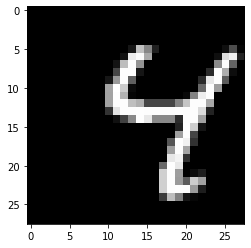

4


numpy.ndarray

In [ ]:
# Plotting an image
show_image(shift_test_set[6][0])
print(get_number(shift_test_set[6]))
type(shift_test_set[6][0])

**Test model with shifted images:**

In [ ]:
shift_output = []
for i in range(len(shift_test_set)):
  o_shift, _, _, _, _, _, _, _ = run_nn(shift_test_set[i][0],final_w21Mat, final_w32Mat, final_w43Mat, final_b1, final_b2, final_b3)
  shift_output.append(o_shift)
print('Shifted Test set Accuracy: ' + str(calculate_accuracy_percent(shift_test_set, shift_output)))

Shifted Test set Accuracy: 0.2676


**Testing our model using tanh activation function:**

In [200]:
number_of_epochs_final = 10
tanh_total_time, tanh_total_accuracy, tanh_costPerEpoch, tanh_w21Mat, tanh_w32Mat, tanh_w43Mat, tanh_b1, tanh_b2, tanh_b3  = nn_vectorized(train_set, images_count=60000, learning_rate=0.05, number_of_epochs=number_of_epochs_final, batch_size=2, activation_func= tanh)

Total run time: 6.579898269971212 min
Train Set Accuracy: 0.8415966666666667


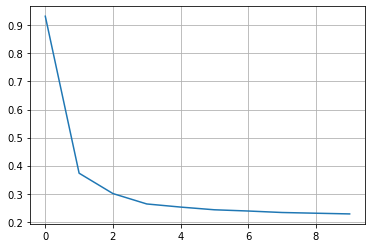

In [201]:
print("Total run time:", tanh_total_time/60, "min")
print("Train Set Accuracy:", tanh_total_accuracy)
plot(np.arange(0, number_of_epochs_final, step = 1), tanh_costPerEpoch)

Run test set with tanh actiovation function:

In [202]:
tanh_output = []
for i in range(len(test_set)):
  tanh_o, _, _, _, _, _, _, _ = run_nn(test_set[i][0],tanh_w21Mat, tanh_w32Mat, tanh_w43Mat, tanh_b1, tanh_b2, tanh_b3, tanh)
  tanh_output.append(tanh_o)
print('Test set Accuracy: ' + str(calculate_accuracy_percent(test_set, tanh_output)))

Test set Accuracy: 0.9
